In [57]:
%pylab inline

import numpy as np
import scipy
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D



Populating the interactive namespace from numpy and matplotlib


# Introduce Mathematical Optimization

https://scipy-lectures.org/advanced/mathematical_optimization/index.html

## Convex VS  Non-Convex Optimization

Convex function이란 오직 단 하나의 global minimum값을 갖고 있습니다.<br>
Non convex function의 경우 local minima (global minimum값보다는 더 깊지 않은 것) 가 존재합니다.

또한 아래의 선에서 한 점을 찍고 다른 곳에 다른 한 점을 찍은후 직선을 그었을때 걸리는 부분이 있으면 non-convex라고 볼 수 있습니다.

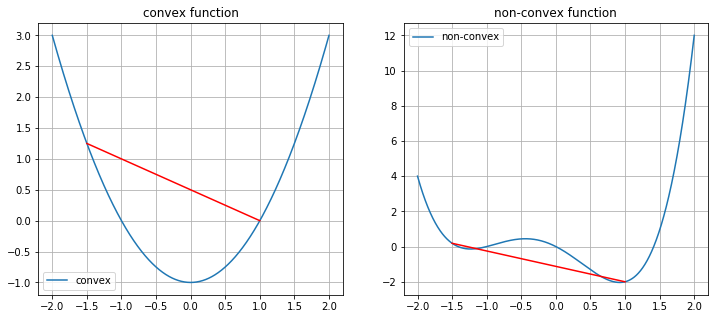

In [88]:
def convex(x):
    return x**2-1

def non_convex(x):
    return x**4 + x**3 -2*x**2 - 2*x


x = np.linspace(-2, 2, 1000)
line_x = np.array([-1.5, 1.0])


fig, plots = subplots(1, 2, figsize=(12, 5))
sns.lineplot(x, convex(x), ax=plots[0], label='convex')
sns.lineplot(x, non_convex(x), ax=plots[1], label='non-convex')
sns.lineplot(line_x, convex(line_x), ax=plots[0], color='red')
sns.lineplot(line_x, non_convex(line_x), ax=plots[1], color='red')
plots[0].set_title('convex function')
plots[1].set_title('non-convex function')
plots[0].grid()
plots[1].grid()

## Smooth and Non-Smooth Problems

아래 smooth의 경우 모든 지점에서 gradient가 존재하며 continuous function이기 때문에 <br>
smooth function을 optimization하는 것이 non-smooth 문제보다 더 쉽습니다.

반명에 직선형태로 떨어지는 문제에서는 linear programming으로 문제를 해결하면 아주 정확한 optimization값을 알아 낼 수 있습니다.

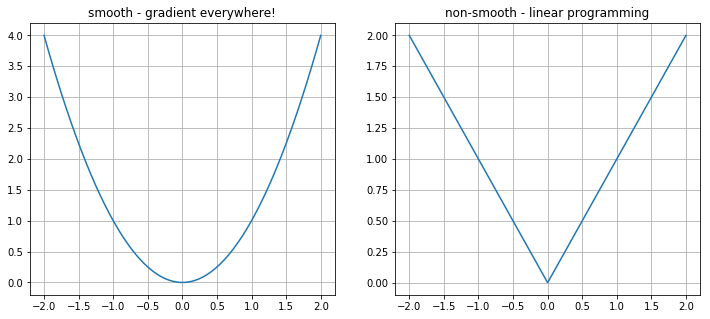

In [102]:
def smooth(x):
    return x**2

def non_smooth(x):
    return abs(x)

x = np.linspace(-2, 2, 1000)

fig, plots = subplots(1, 2, figsize=(12, 5))
sns.lineplot(x, smooth(x), ax=plots[0])
sns.lineplot(x, non_smooth(x), ax=plots[1])
plots[0].set_title('smooth - gradient everywhere!')
plots[1].set_title('non-smooth - linear programming')
plots[0].grid()
plots[1].grid()

# Code Snippets

## Global Optimization


<IPython.core.display.Javascript object>


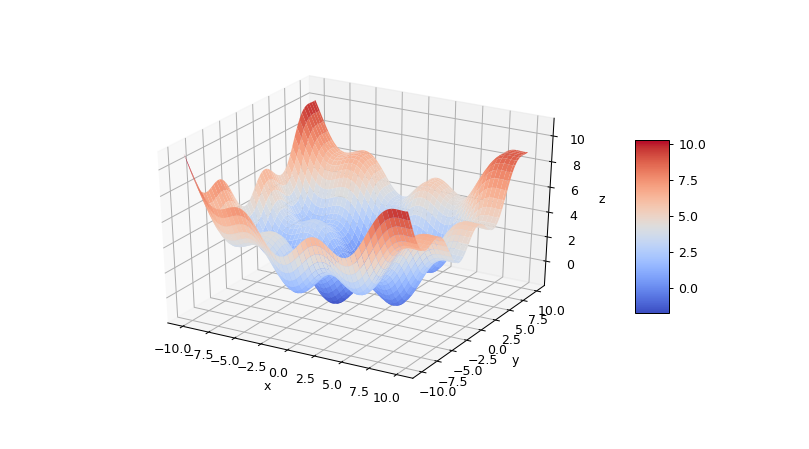

In [48]:
def fm(data, debug=True):
    x = data[0]
    y = data[1]
    z = (np.sin(x) + 0.05 * x**2 +
         np.sin(y) + 0.05 * y**2)
    if debug:
        print(f'x:{x:>8.4} | y:{y:>8.4} | z:{z:>8.4}')
    return z

x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
Z = fm((X, Y), debug=False)


fig = plt.figure(figsize=(9, 5))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=2, cstride=2, cmap=cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.grid()

In [100]:
from scipy import optimize
from scipy import interpolate

opt1 = optimize.brute(fm, ((-10, 10.1, 0.1), (-10, 10.1, 0.1)), finish=None)
print('optimized:', opt1)

x:   -10.0 | y:   -10.0 | z:   11.09
x:   -10.0 | y:   -10.0 | z:   11.09
x:   -10.0 | y:    -9.9 | z:    10.9
x:   -10.0 | y:    -9.8 | z:   10.71
x:   -10.0 | y:    -9.7 | z:   10.52
x:   -10.0 | y:    -9.6 | z:   10.33
x:   -10.0 | y:    -9.5 | z:   10.13
x:   -10.0 | y:    -9.4 | z:   9.937
x:   -10.0 | y:    -9.3 | z:   9.744
x:   -10.0 | y:    -9.2 | z:   9.553
x:   -10.0 | y:    -9.1 | z:   9.365
x:   -10.0 | y:    -9.0 | z:   9.182
x:   -10.0 | y:    -8.9 | z:   9.004
x:   -10.0 | y:    -8.8 | z:   8.831
x:   -10.0 | y:    -8.7 | z:   8.666
x:   -10.0 | y:    -8.6 | z:   8.508
x:   -10.0 | y:    -8.5 | z:   8.358
x:   -10.0 | y:    -8.4 | z:   8.217
x:   -10.0 | y:    -8.3 | z:   8.086
x:   -10.0 | y:    -8.2 | z:   7.965
x:   -10.0 | y:    -8.1 | z:   7.855
x:   -10.0 | y:    -8.0 | z:   7.755
x:   -10.0 | y:    -7.9 | z:   7.666
x:   -10.0 | y:    -7.8 | z:   7.587
x:   -10.0 | y:    -7.7 | z:    7.52
x:   -10.0 | y:    -7.6 | z:   7.464
x:   -10.0 | y:    -7.5 | z:   7.419
x

x:    -9.0 | y:     9.9 | z:   8.081
x:    -9.0 | y:    10.0 | z:   8.094
x:    -8.9 | y:   -10.0 | z:   9.004
x:    -8.9 | y:    -9.9 | z:   8.818
x:    -8.9 | y:    -9.8 | z:   8.628
x:    -8.9 | y:    -9.7 | z:   8.436
x:    -8.9 | y:    -9.6 | z:   8.242
x:    -8.9 | y:    -9.5 | z:   8.047
x:    -8.9 | y:    -9.4 | z:   7.853
x:    -8.9 | y:    -9.3 | z:    7.66
x:    -8.9 | y:    -9.2 | z:   7.469
x:    -8.9 | y:    -9.1 | z:   7.281
x:    -8.9 | y:    -9.0 | z:   7.097
x:    -8.9 | y:    -8.9 | z:   6.919
x:    -8.9 | y:    -8.8 | z:   6.747
x:    -8.9 | y:    -8.7 | z:   6.581
x:    -8.9 | y:    -8.6 | z:   6.423
x:    -8.9 | y:    -8.5 | z:   6.273
x:    -8.9 | y:    -8.4 | z:   6.133
x:    -8.9 | y:    -8.3 | z:   6.002
x:    -8.9 | y:    -8.2 | z:   5.881
x:    -8.9 | y:    -8.1 | z:    5.77
x:    -8.9 | y:    -8.0 | z:    5.67
x:    -8.9 | y:    -7.9 | z:   5.581
x:    -8.9 | y:    -7.8 | z:   5.503
x:    -8.9 | y:    -7.7 | z:   5.436
x:    -8.9 | y:    -7.6 | z:    5.38
x

x:    -8.0 | y:    -6.3 | z:   4.178
x:    -8.0 | y:    -6.2 | z:   4.216
x:    -8.0 | y:    -6.1 | z:   4.253
x:    -8.0 | y:    -6.0 | z:    4.29
x:    -8.0 | y:    -5.9 | z:   4.325
x:    -8.0 | y:    -5.8 | z:   4.357
x:    -8.0 | y:    -5.7 | z:   4.386
x:    -8.0 | y:    -5.6 | z:    4.41
x:    -8.0 | y:    -5.5 | z:   4.429
x:    -8.0 | y:    -5.4 | z:   4.441
x:    -8.0 | y:    -5.3 | z:   4.447
x:    -8.0 | y:    -5.2 | z:   4.446
x:    -8.0 | y:    -5.1 | z:   4.437
x:    -8.0 | y:    -5.0 | z:    4.42
x:    -8.0 | y:    -4.9 | z:   4.394
x:    -8.0 | y:    -4.8 | z:   4.359
x:    -8.0 | y:    -4.7 | z:   4.315
x:    -8.0 | y:    -4.6 | z:   4.262
x:    -8.0 | y:    -4.5 | z:   4.201
x:    -8.0 | y:    -4.4 | z:    4.13
x:    -8.0 | y:    -4.3 | z:   4.051
x:    -8.0 | y:    -4.2 | z:   3.964
x:    -8.0 | y:    -4.1 | z:   3.869
x:    -8.0 | y:    -4.0 | z:   3.767
x:    -8.0 | y:    -3.9 | z:   3.659
x:    -8.0 | y:    -3.8 | z:   3.544
x:    -8.0 | y:    -3.7 | z:   3.425
x

x:    -7.0 | y:    -7.3 | z:   3.607
x:    -7.0 | y:    -7.2 | z:   3.591
x:    -7.0 | y:    -7.1 | z:   3.585
x:    -7.0 | y:    -7.0 | z:   3.586
x:    -7.0 | y:    -6.9 | z:   3.595
x:    -7.0 | y:    -6.8 | z:   3.611
x:    -7.0 | y:    -6.7 | z:   3.633
x:    -7.0 | y:    -6.6 | z:   3.659
x:    -7.0 | y:    -6.5 | z:    3.69
x:    -7.0 | y:    -6.4 | z:   3.724
x:    -7.0 | y:    -6.3 | z:   3.761
x:    -7.0 | y:    -6.2 | z:   3.798
x:    -7.0 | y:    -6.1 | z:   3.836
x:    -7.0 | y:    -6.0 | z:   3.872
x:    -7.0 | y:    -5.9 | z:   3.907
x:    -7.0 | y:    -5.8 | z:    3.94
x:    -7.0 | y:    -5.7 | z:   3.968
x:    -7.0 | y:    -5.6 | z:   3.992
x:    -7.0 | y:    -5.5 | z:   4.011
x:    -7.0 | y:    -5.4 | z:   4.024
x:    -7.0 | y:    -5.3 | z:    4.03
x:    -7.0 | y:    -5.2 | z:   4.028
x:    -7.0 | y:    -5.1 | z:   4.019
x:    -7.0 | y:    -5.0 | z:   4.002
x:    -7.0 | y:    -4.9 | z:   3.976
x:    -7.0 | y:    -4.8 | z:   3.941
x:    -7.0 | y:    -4.7 | z:   3.897
x

x:    -6.0 | y:    -8.4 | z:   4.753
x:    -6.0 | y:    -8.3 | z:   4.622
x:    -6.0 | y:    -8.2 | z:   4.501
x:    -6.0 | y:    -8.1 | z:    4.39
x:    -6.0 | y:    -8.0 | z:    4.29
x:    -6.0 | y:    -7.9 | z:   4.201
x:    -6.0 | y:    -7.8 | z:   4.123
x:    -6.0 | y:    -7.7 | z:   4.056
x:    -6.0 | y:    -7.6 | z:   3.999
x:    -6.0 | y:    -7.5 | z:   3.954
x:    -6.0 | y:    -7.4 | z:   3.919
x:    -6.0 | y:    -7.3 | z:   3.893
x:    -6.0 | y:    -7.2 | z:   3.878
x:    -6.0 | y:    -7.1 | z:   3.871
x:    -6.0 | y:    -7.0 | z:   3.872
x:    -6.0 | y:    -6.9 | z:   3.881
x:    -6.0 | y:    -6.8 | z:   3.897
x:    -6.0 | y:    -6.7 | z:   3.919
x:    -6.0 | y:    -6.6 | z:   3.946
x:    -6.0 | y:    -6.5 | z:   3.977
x:    -6.0 | y:    -6.4 | z:   4.011
x:    -6.0 | y:    -6.3 | z:   4.047
x:    -6.0 | y:    -6.2 | z:   4.085
x:    -6.0 | y:    -6.1 | z:   4.122
x:    -6.0 | y:    -6.0 | z:   4.159
x:    -6.0 | y:    -5.9 | z:   4.194
x:    -6.0 | y:    -5.8 | z:   4.226
x

x:    -5.0 | y:    -5.4 | z:    4.44
x:    -5.0 | y:    -5.3 | z:   4.446
x:    -5.0 | y:    -5.2 | z:   4.444
x:    -5.0 | y:    -5.1 | z:   4.435
x:    -5.0 | y:    -5.0 | z:   4.418
x:    -5.0 | y:    -4.9 | z:   4.392
x:    -5.0 | y:    -4.8 | z:   4.357
x:    -5.0 | y:    -4.7 | z:   4.313
x:    -5.0 | y:    -4.6 | z:   4.261
x:    -5.0 | y:    -4.5 | z:   4.199
x:    -5.0 | y:    -4.4 | z:   4.129
x:    -5.0 | y:    -4.3 | z:    4.05
x:    -5.0 | y:    -4.2 | z:   3.963
x:    -5.0 | y:    -4.1 | z:   3.868
x:    -5.0 | y:    -4.0 | z:   3.766
x:    -5.0 | y:    -3.9 | z:   3.657
x:    -5.0 | y:    -3.8 | z:   3.543
x:    -5.0 | y:    -3.7 | z:   3.423
x:    -5.0 | y:    -3.6 | z:   3.299
x:    -5.0 | y:    -3.5 | z:   3.172
x:    -5.0 | y:    -3.4 | z:   3.042
x:    -5.0 | y:    -3.3 | z:   2.911
x:    -5.0 | y:    -3.2 | z:   2.779
x:    -5.0 | y:    -3.1 | z:   2.648
x:    -5.0 | y:    -3.0 | z:   2.518
x:    -5.0 | y:    -2.9 | z:    2.39
x:    -5.0 | y:    -2.8 | z:   2.266
x

x:    -4.1 | y:     9.6 | z:   6.092
x:    -4.1 | y:     9.7 | z:   6.092
x:    -4.1 | y:     9.8 | z:   6.094
x:    -4.1 | y:     9.9 | z:   6.102
x:    -4.1 | y:    10.0 | z:   6.115
x:    -4.0 | y:   -10.0 | z:   7.101
x:    -4.0 | y:    -9.9 | z:   6.915
x:    -4.0 | y:    -9.8 | z:   6.725
x:    -4.0 | y:    -9.7 | z:   6.533
x:    -4.0 | y:    -9.6 | z:   6.339
x:    -4.0 | y:    -9.5 | z:   6.144
x:    -4.0 | y:    -9.4 | z:    5.95
x:    -4.0 | y:    -9.3 | z:   5.757
x:    -4.0 | y:    -9.2 | z:   5.566
x:    -4.0 | y:    -9.1 | z:   5.378
x:    -4.0 | y:    -9.0 | z:   5.195
x:    -4.0 | y:    -8.9 | z:   5.016
x:    -4.0 | y:    -8.8 | z:   4.844
x:    -4.0 | y:    -8.7 | z:   4.678
x:    -4.0 | y:    -8.6 | z:    4.52
x:    -4.0 | y:    -8.5 | z:   4.371
x:    -4.0 | y:    -8.4 | z:    4.23
x:    -4.0 | y:    -8.3 | z:   4.099
x:    -4.0 | y:    -8.2 | z:   3.978
x:    -4.0 | y:    -8.1 | z:   3.867
x:    -4.0 | y:    -8.0 | z:   3.767
x:    -4.0 | y:    -7.9 | z:   3.678
x

x:    -3.0 | y:    -9.5 | z:   4.897
x:    -3.0 | y:    -9.4 | z:   4.702
x:    -3.0 | y:    -9.3 | z:   4.509
x:    -3.0 | y:    -9.2 | z:   4.318
x:    -3.0 | y:    -9.1 | z:    4.13
x:    -3.0 | y:    -9.0 | z:   3.947
x:    -3.0 | y:    -8.9 | z:   3.768
x:    -3.0 | y:    -8.8 | z:   3.596
x:    -3.0 | y:    -8.7 | z:    3.43
x:    -3.0 | y:    -8.6 | z:   3.272
x:    -3.0 | y:    -8.5 | z:   3.123
x:    -3.0 | y:    -8.4 | z:   2.982
x:    -3.0 | y:    -8.3 | z:   2.851
x:    -3.0 | y:    -8.2 | z:    2.73
x:    -3.0 | y:    -8.1 | z:   2.619
x:    -3.0 | y:    -8.0 | z:    2.52
x:    -3.0 | y:    -7.9 | z:    2.43
x:    -3.0 | y:    -7.8 | z:   2.352
x:    -3.0 | y:    -7.7 | z:   2.285
x:    -3.0 | y:    -7.6 | z:   2.229
x:    -3.0 | y:    -7.5 | z:   2.183
x:    -3.0 | y:    -7.4 | z:   2.148
x:    -3.0 | y:    -7.3 | z:   2.123
x:    -3.0 | y:    -7.2 | z:   2.107
x:    -3.0 | y:    -7.1 | z:     2.1
x:    -3.0 | y:    -7.0 | z:   2.102
x:    -3.0 | y:    -6.9 | z:   2.111
x

x:    -2.0 | y:    -7.7 | z:   1.267
x:    -2.0 | y:    -7.6 | z:   1.211
x:    -2.0 | y:    -7.5 | z:   1.165
x:    -2.0 | y:    -7.4 | z:    1.13
x:    -2.0 | y:    -7.3 | z:   1.105
x:    -2.0 | y:    -7.2 | z:   1.089
x:    -2.0 | y:    -7.1 | z:   1.082
x:    -2.0 | y:    -7.0 | z:   1.084
x:    -2.0 | y:    -6.9 | z:   1.093
x:    -2.0 | y:    -6.8 | z:   1.109
x:    -2.0 | y:    -6.7 | z:    1.13
x:    -2.0 | y:    -6.6 | z:   1.157
x:    -2.0 | y:    -6.5 | z:   1.188
x:    -2.0 | y:    -6.4 | z:   1.222
x:    -2.0 | y:    -6.3 | z:   1.258
x:    -2.0 | y:    -6.2 | z:   1.296
x:    -2.0 | y:    -6.1 | z:   1.333
x:    -2.0 | y:    -6.0 | z:    1.37
x:    -2.0 | y:    -5.9 | z:   1.405
x:    -2.0 | y:    -5.8 | z:   1.437
x:    -2.0 | y:    -5.7 | z:   1.466
x:    -2.0 | y:    -5.6 | z:    1.49
x:    -2.0 | y:    -5.5 | z:   1.509
x:    -2.0 | y:    -5.4 | z:   1.521
x:    -2.0 | y:    -5.3 | z:   1.527
x:    -2.0 | y:    -5.2 | z:   1.526
x:    -2.0 | y:    -5.1 | z:   1.517
x

x:    -1.0 | y:    -6.9 | z:   1.011
x:    -1.0 | y:    -6.8 | z:   1.026
x:    -1.0 | y:    -6.7 | z:   1.048
x:    -1.0 | y:    -6.6 | z:   1.075
x:    -1.0 | y:    -6.5 | z:   1.106
x:    -1.0 | y:    -6.4 | z:    1.14
x:    -1.0 | y:    -6.3 | z:   1.176
x:    -1.0 | y:    -6.2 | z:   1.214
x:    -1.0 | y:    -6.1 | z:   1.251
x:    -1.0 | y:    -6.0 | z:   1.288
x:    -1.0 | y:    -5.9 | z:   1.323
x:    -1.0 | y:    -5.8 | z:   1.355
x:    -1.0 | y:    -5.7 | z:   1.384
x:    -1.0 | y:    -5.6 | z:   1.408
x:    -1.0 | y:    -5.5 | z:   1.427
x:    -1.0 | y:    -5.4 | z:   1.439
x:    -1.0 | y:    -5.3 | z:   1.445
x:    -1.0 | y:    -5.2 | z:   1.444
x:    -1.0 | y:    -5.1 | z:   1.435
x:    -1.0 | y:    -5.0 | z:   1.417
x:    -1.0 | y:    -4.9 | z:   1.391
x:    -1.0 | y:    -4.8 | z:   1.357
x:    -1.0 | y:    -4.7 | z:   1.313
x:    -1.0 | y:    -4.6 | z:    1.26
x:    -1.0 | y:    -4.5 | z:   1.199
x:    -1.0 | y:    -4.4 | z:   1.128
x:    -1.0 | y:    -4.3 | z:   1.049
x

x:     0.2 | y:    -4.9 | z:   2.384
x:     0.2 | y:    -4.8 | z:   2.349
x:     0.2 | y:    -4.7 | z:   2.305
x:     0.2 | y:    -4.6 | z:   2.252
x:     0.2 | y:    -4.5 | z:   2.191
x:     0.2 | y:    -4.4 | z:    2.12
x:     0.2 | y:    -4.3 | z:   2.041
x:     0.2 | y:    -4.2 | z:   1.954
x:     0.2 | y:    -4.1 | z:   1.859
x:     0.2 | y:    -4.0 | z:   1.757
x:     0.2 | y:    -3.9 | z:   1.649
x:     0.2 | y:    -3.8 | z:   1.535
x:     0.2 | y:    -3.7 | z:   1.415
x:     0.2 | y:    -3.6 | z:   1.291
x:     0.2 | y:    -3.5 | z:   1.164
x:     0.2 | y:    -3.4 | z:   1.034
x:     0.2 | y:    -3.3 | z:  0.9029
x:     0.2 | y:    -3.2 | z:   0.771
x:     0.2 | y:    -3.1 | z:  0.6396
x:     0.2 | y:    -3.0 | z:  0.5095
x:     0.2 | y:    -2.9 | z:  0.3819
x:     0.2 | y:    -2.8 | z:  0.2577
x:     0.2 | y:    -2.7 | z:  0.1378
x:     0.2 | y:    -2.6 | z: 0.02317
x:     0.2 | y:    -2.5 | z: -0.0853
x:     0.2 | y:    -2.4 | z: -0.1868
x:     0.2 | y:    -2.3 | z: -0.2805
x

x:     1.2 | y:     9.3 | z:   5.453
x:     1.2 | y:     9.4 | z:   5.447
x:     1.2 | y:     9.5 | z:   5.441
x:     1.2 | y:     9.6 | z:   5.438
x:     1.2 | y:     9.7 | z:   5.437
x:     1.2 | y:     9.8 | z:    5.44
x:     1.2 | y:     9.9 | z:   5.447
x:     1.2 | y:    10.0 | z:    5.46
x:     1.3 | y:   -10.0 | z:   6.592
x:     1.3 | y:    -9.9 | z:   6.406
x:     1.3 | y:    -9.8 | z:   6.217
x:     1.3 | y:    -9.7 | z:   6.024
x:     1.3 | y:    -9.6 | z:    5.83
x:     1.3 | y:    -9.5 | z:   5.636
x:     1.3 | y:    -9.4 | z:   5.441
x:     1.3 | y:    -9.3 | z:   5.248
x:     1.3 | y:    -9.2 | z:   5.057
x:     1.3 | y:    -9.1 | z:   4.869
x:     1.3 | y:    -9.0 | z:   4.686
x:     1.3 | y:    -8.9 | z:   4.508
x:     1.3 | y:    -8.8 | z:   4.335
x:     1.3 | y:    -8.7 | z:    4.17
x:     1.3 | y:    -8.6 | z:   4.012
x:     1.3 | y:    -8.5 | z:   3.862
x:     1.3 | y:    -8.4 | z:   3.721
x:     1.3 | y:    -8.3 | z:    3.59
x:     1.3 | y:    -8.2 | z:   3.469
x

x:     2.5 | y:     9.8 | z:   5.346
x:     2.5 | y:     9.9 | z:   5.354
x:     2.5 | y:    10.0 | z:   5.367
x:     2.6 | y:   -10.0 | z:   6.398
x:     2.6 | y:    -9.9 | z:   6.212
x:     2.6 | y:    -9.8 | z:   6.022
x:     2.6 | y:    -9.7 | z:    5.83
x:     2.6 | y:    -9.6 | z:   5.636
x:     2.6 | y:    -9.5 | z:   5.441
x:     2.6 | y:    -9.4 | z:   5.247
x:     2.6 | y:    -9.3 | z:   5.054
x:     2.6 | y:    -9.2 | z:   4.863
x:     2.6 | y:    -9.1 | z:   4.675
x:     2.6 | y:    -9.0 | z:   4.491
x:     2.6 | y:    -8.9 | z:   4.313
x:     2.6 | y:    -8.8 | z:   4.141
x:     2.6 | y:    -8.7 | z:   3.975
x:     2.6 | y:    -8.6 | z:   3.817
x:     2.6 | y:    -8.5 | z:   3.668
x:     2.6 | y:    -8.4 | z:   3.527
x:     2.6 | y:    -8.3 | z:   3.396
x:     2.6 | y:    -8.2 | z:   3.275
x:     2.6 | y:    -8.1 | z:   3.164
x:     2.6 | y:    -8.0 | z:   3.064
x:     2.6 | y:    -7.9 | z:   2.975
x:     2.6 | y:    -7.8 | z:   2.897
x:     2.6 | y:    -7.7 | z:    2.83
x

x:     3.7 | y:    -8.5 | z:   2.969
x:     3.7 | y:    -8.4 | z:   2.828
x:     3.7 | y:    -8.3 | z:   2.697
x:     3.7 | y:    -8.2 | z:   2.576
x:     3.7 | y:    -8.1 | z:   2.465
x:     3.7 | y:    -8.0 | z:   2.365
x:     3.7 | y:    -7.9 | z:   2.276
x:     3.7 | y:    -7.8 | z:   2.198
x:     3.7 | y:    -7.7 | z:   2.131
x:     3.7 | y:    -7.6 | z:   2.075
x:     3.7 | y:    -7.5 | z:   2.029
x:     3.7 | y:    -7.4 | z:   1.994
x:     3.7 | y:    -7.3 | z:   1.969
x:     3.7 | y:    -7.2 | z:   1.953
x:     3.7 | y:    -7.1 | z:   1.946
x:     3.7 | y:    -7.0 | z:   1.948
x:     3.7 | y:    -6.9 | z:   1.957
x:     3.7 | y:    -6.8 | z:   1.973
x:     3.7 | y:    -6.7 | z:   1.994
x:     3.7 | y:    -6.6 | z:   2.021
x:     3.7 | y:    -6.5 | z:   2.052
x:     3.7 | y:    -6.4 | z:   2.086
x:     3.7 | y:    -6.3 | z:   2.122
x:     3.7 | y:    -6.2 | z:    2.16
x:     3.7 | y:    -6.1 | z:   2.197
x:     3.7 | y:    -6.0 | z:   2.234
x:     3.7 | y:    -5.9 | z:   2.269
x

x:     4.9 | y:     0.2 | z:  0.4187
x:     4.9 | y:     0.3 | z:  0.5181
x:     4.9 | y:     0.4 | z:  0.6155
x:     4.9 | y:     0.5 | z:    0.71
x:     4.9 | y:     0.6 | z:  0.8007
x:     4.9 | y:     0.7 | z:  0.8868
x:     4.9 | y:     0.8 | z:  0.9674
x:     4.9 | y:     0.9 | z:   1.042
x:     4.9 | y:     1.0 | z:    1.11
x:     4.9 | y:     1.1 | z:    1.17
x:     4.9 | y:     1.2 | z:   1.222
x:     4.9 | y:     1.3 | z:   1.266
x:     4.9 | y:     1.4 | z:   1.301
x:     4.9 | y:     1.5 | z:   1.328
x:     4.9 | y:     1.6 | z:   1.346
x:     4.9 | y:     1.7 | z:   1.354
x:     4.9 | y:     1.8 | z:   1.354
x:     4.9 | y:     1.9 | z:   1.345
x:     4.9 | y:     2.0 | z:   1.327
x:     4.9 | y:     2.1 | z:   1.302
x:     4.9 | y:     2.2 | z:   1.269
x:     4.9 | y:     2.3 | z:   1.228
x:     4.9 | y:     2.4 | z:   1.182
x:     4.9 | y:     2.5 | z:   1.129
x:     4.9 | y:     2.6 | z:   1.072
x:     4.9 | y:     2.7 | z:    1.01
x:     4.9 | y:     2.8 | z:   0.945
x

x:     6.2 | y:    -5.0 | z:   4.048
x:     6.2 | y:    -4.9 | z:   4.022
x:     6.2 | y:    -4.8 | z:   3.987
x:     6.2 | y:    -4.7 | z:   3.943
x:     6.2 | y:    -4.6 | z:   3.891
x:     6.2 | y:    -4.5 | z:   3.829
x:     6.2 | y:    -4.4 | z:   3.759
x:     6.2 | y:    -4.3 | z:    3.68
x:     6.2 | y:    -4.2 | z:   3.592
x:     6.2 | y:    -4.1 | z:   3.498
x:     6.2 | y:    -4.0 | z:   3.396
x:     6.2 | y:    -3.9 | z:   3.287
x:     6.2 | y:    -3.8 | z:   3.173
x:     6.2 | y:    -3.7 | z:   3.053
x:     6.2 | y:    -3.6 | z:   2.929
x:     6.2 | y:    -3.5 | z:   2.802
x:     6.2 | y:    -3.4 | z:   2.672
x:     6.2 | y:    -3.3 | z:   2.541
x:     6.2 | y:    -3.2 | z:   2.409
x:     6.2 | y:    -3.1 | z:   2.278
x:     6.2 | y:    -3.0 | z:   2.148
x:     6.2 | y:    -2.9 | z:    2.02
x:     6.2 | y:    -2.8 | z:   1.896
x:     6.2 | y:    -2.7 | z:   1.776
x:     6.2 | y:    -2.6 | z:   1.661
x:     6.2 | y:    -2.5 | z:   1.553
x:     6.2 | y:    -2.4 | z:   1.451
x

x:     7.4 | y:    -2.4 | z:   3.249
x:     7.4 | y:    -2.3 | z:   3.156
x:     7.4 | y:    -2.2 | z:    3.07
x:     7.4 | y:    -2.1 | z:   2.994
x:     7.4 | y:    -2.0 | z:   2.927
x:     7.4 | y:    -1.9 | z:   2.871
x:     7.4 | y:    -1.8 | z:   2.825
x:     7.4 | y:    -1.7 | z:    2.79
x:     7.4 | y:    -1.6 | z:   2.765
x:     7.4 | y:    -1.5 | z:   2.752
x:     7.4 | y:    -1.4 | z:   2.749
x:     7.4 | y:    -1.3 | z:   2.758
x:     7.4 | y:    -1.2 | z:   2.777
x:     7.4 | y:    -1.1 | z:   2.806
x:     7.4 | y:    -1.0 | z:   2.845
x:     7.4 | y:    -0.9 | z:   2.894
x:     7.4 | y:    -0.8 | z:   2.951
x:     7.4 | y:    -0.7 | z:   3.017
x:     7.4 | y:    -0.6 | z:    3.09
x:     7.4 | y:    -0.5 | z:    3.17
x:     7.4 | y:    -0.4 | z:   3.255
x:     7.4 | y:    -0.3 | z:   3.346
x:     7.4 | y:    -0.2 | z:    3.44
x:     7.4 | y:    -0.1 | z:   3.537
x:     7.4 | y:     0.0 | z:   3.637
x:     7.4 | y:     0.1 | z:   3.737
x:     7.4 | y:     0.2 | z:   3.837
x

x:     8.7 | y:     2.8 | z:   5.174
x:     8.7 | y:     2.9 | z:   5.107
x:     8.7 | y:     3.0 | z:   5.039
x:     8.7 | y:     3.1 | z:    4.97
x:     8.7 | y:     3.2 | z:   4.901
x:     8.7 | y:     3.3 | z:   4.834
x:     8.7 | y:     3.4 | z:    4.77
x:     8.7 | y:     3.5 | z:   4.709
x:     8.7 | y:     3.6 | z:   4.653
x:     8.7 | y:     3.7 | z:   4.602
x:     8.7 | y:     3.8 | z:   4.558
x:     8.7 | y:     3.9 | z:    4.52
x:     8.7 | y:     4.0 | z:   4.491
x:     8.7 | y:     4.1 | z:    4.47
x:     8.7 | y:     4.2 | z:   4.458
x:     8.7 | y:     4.3 | z:   4.456
x:     8.7 | y:     4.4 | z:   4.464
x:     8.7 | y:     4.5 | z:   4.482
x:     8.7 | y:     4.6 | z:   4.512
x:     8.7 | y:     4.7 | z:   4.552
x:     8.7 | y:     4.8 | z:   4.603
x:     8.7 | y:     4.9 | z:   4.666
x:     8.7 | y:     5.0 | z:   4.739
x:     8.7 | y:     5.1 | z:   4.822
x:     8.7 | y:     5.2 | z:   4.916
x:     8.7 | y:     5.3 | z:    5.02
x:     8.7 | y:     5.4 | z:   5.133
x

x:     9.9 | y:    -5.0 | z:   6.652
x:     9.9 | y:    -4.9 | z:   6.626
x:     9.9 | y:    -4.8 | z:   6.591
x:     9.9 | y:    -4.7 | z:   6.547
x:     9.9 | y:    -4.6 | z:   6.495
x:     9.9 | y:    -4.5 | z:   6.433
x:     9.9 | y:    -4.4 | z:   6.363
x:     9.9 | y:    -4.3 | z:   6.284
x:     9.9 | y:    -4.2 | z:   6.197
x:     9.9 | y:    -4.1 | z:   6.102
x:     9.9 | y:    -4.0 | z:     6.0
x:     9.9 | y:    -3.9 | z:   5.891
x:     9.9 | y:    -3.8 | z:   5.777
x:     9.9 | y:    -3.7 | z:   5.657
x:     9.9 | y:    -3.6 | z:   5.533
x:     9.9 | y:    -3.5 | z:   5.406
x:     9.9 | y:    -3.4 | z:   5.277
x:     9.9 | y:    -3.3 | z:   5.145
x:     9.9 | y:    -3.2 | z:   5.013
x:     9.9 | y:    -3.1 | z:   4.882
x:     9.9 | y:    -3.0 | z:   4.752
x:     9.9 | y:    -2.9 | z:   4.624
x:     9.9 | y:    -2.8 | z:     4.5
x:     9.9 | y:    -2.7 | z:    4.38
x:     9.9 | y:    -2.6 | z:   4.265
x:     9.9 | y:    -2.5 | z:   4.157
x:     9.9 | y:    -2.4 | z:   4.056
x

In [101]:
fm(opt1, debug=False)

-1.7748994599769203

## Local Optimization